# TOF_SIMS tutorial

## Setup

Instal the package

In [ ]:
!pip install TOF_SIMS

In [2]:
import TOF_SIMS as ts

## Import dataset

In [3]:
sample = ts.TOF_SIMS("E:/aluminum.h5")

Cache size =  3
Opening aluminum.h5
Extraction of sum_spectrum done
Extraction of mass_axis done
TOF_SIMS imported successfully


# Quickly inspect sample

## Sample surface

Every figure can be saved using the <i><b>.savefig("figure name.jpg") method</i></b>

SEM image of sample surface taken BEFORE FIB-ing

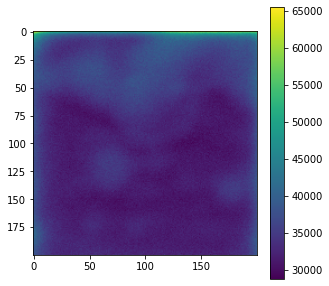

In [4]:
sample.plot_FIBImage(figsize = (5,5),cmap = "viridis")

## Sample slices

Let's look at all cross sections of sample at each z, all masses summed together:


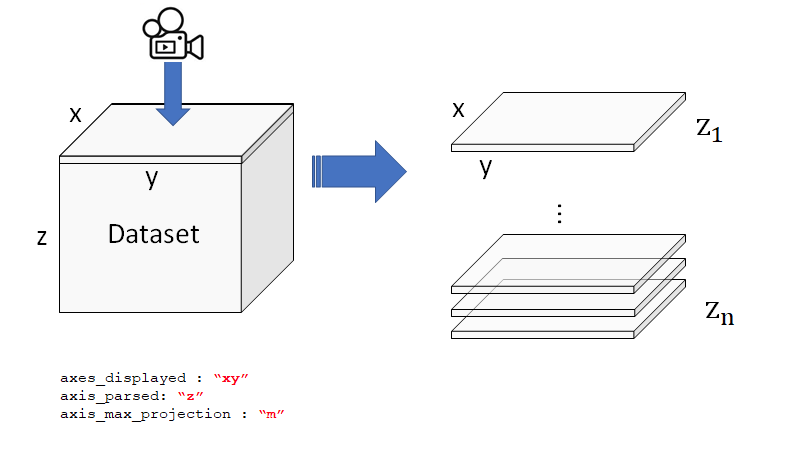

Each subplot represents the summ of all masses that have been detected for each z-slice.

Individual subplot represents z axis with row = y-axis, column = x-axis projected over n-axis
Projection shape: (100, 100, 100)


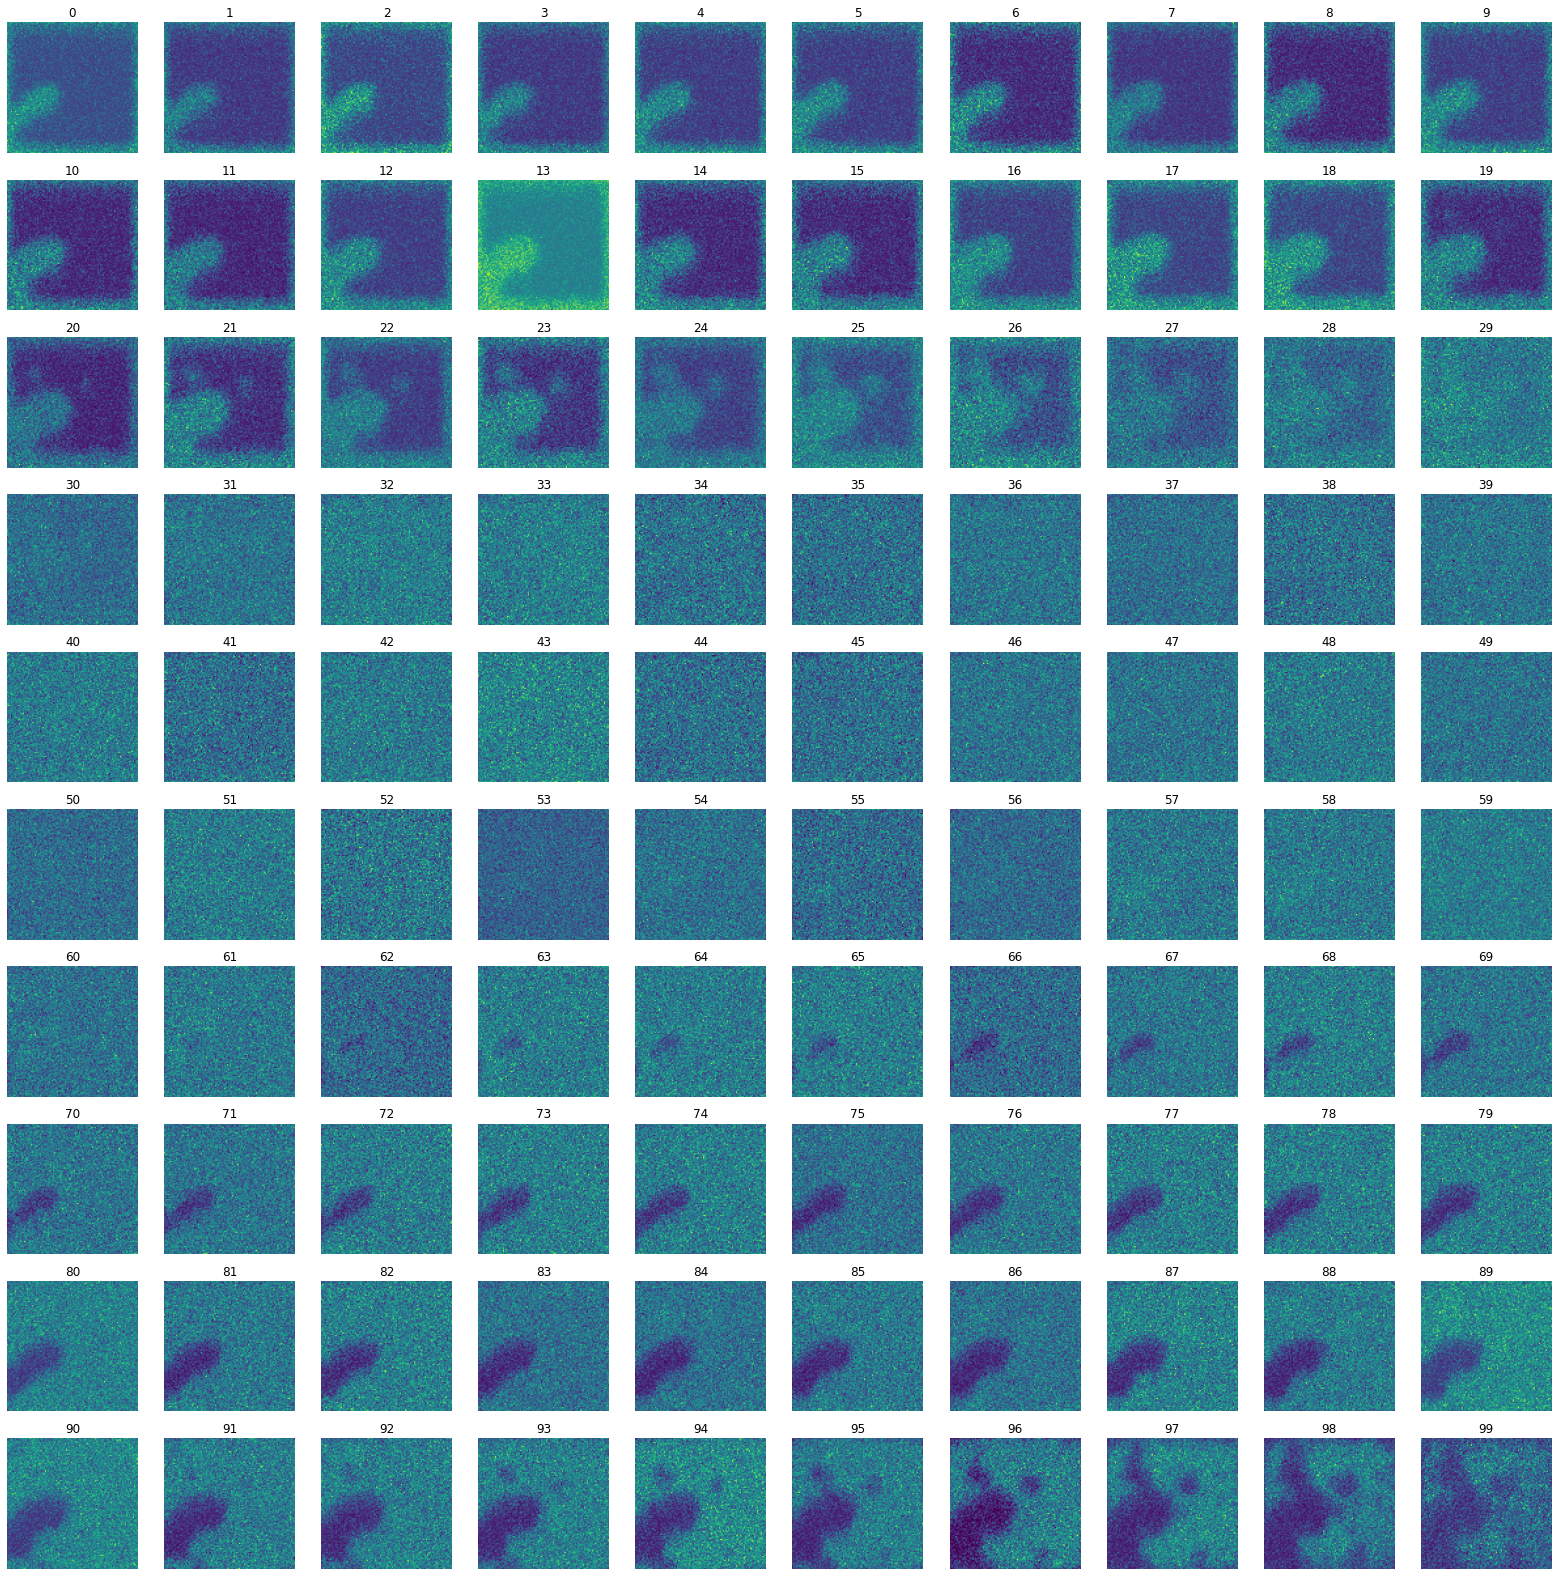

In [5]:
sample.projection(axes_displayed = "xy", axis_parsed = "z", axis_max_projection = "n")

## Mass spectrum

* Easily adjust min/max masses and sum of detected events (Sumspectrum).

* Zoom in on regions(masses) of interest by passing it as argument to function.

* To make the graph interactive set interactive = True (make sure to use subset of data (by reducing sum_spectrum_max).


In [ ]:
sample.mass_spec(mass_min = 1 , mass_max = 250 , sum_spectrum_max=80000)

## Overview of masses abundances (maximal projections over z axis)

The function <b>max_proj_peak_data</b> allows you to visualise maximal projections along any axes:

    axes_displayed : axes to be displayed on each image (first/last : row/col)
    axis_parsed : axis used to generate individual plot
    axis_max_projection : axis that will be summed
    
### Top projection:

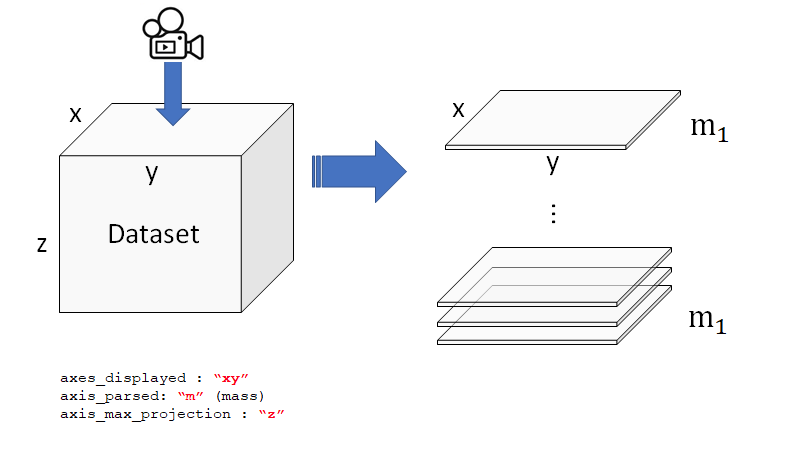

Individual subplot represents m axis with row = y-axis, column = x-axis projected over z-axis
Projection shape: (100, 100, 250)


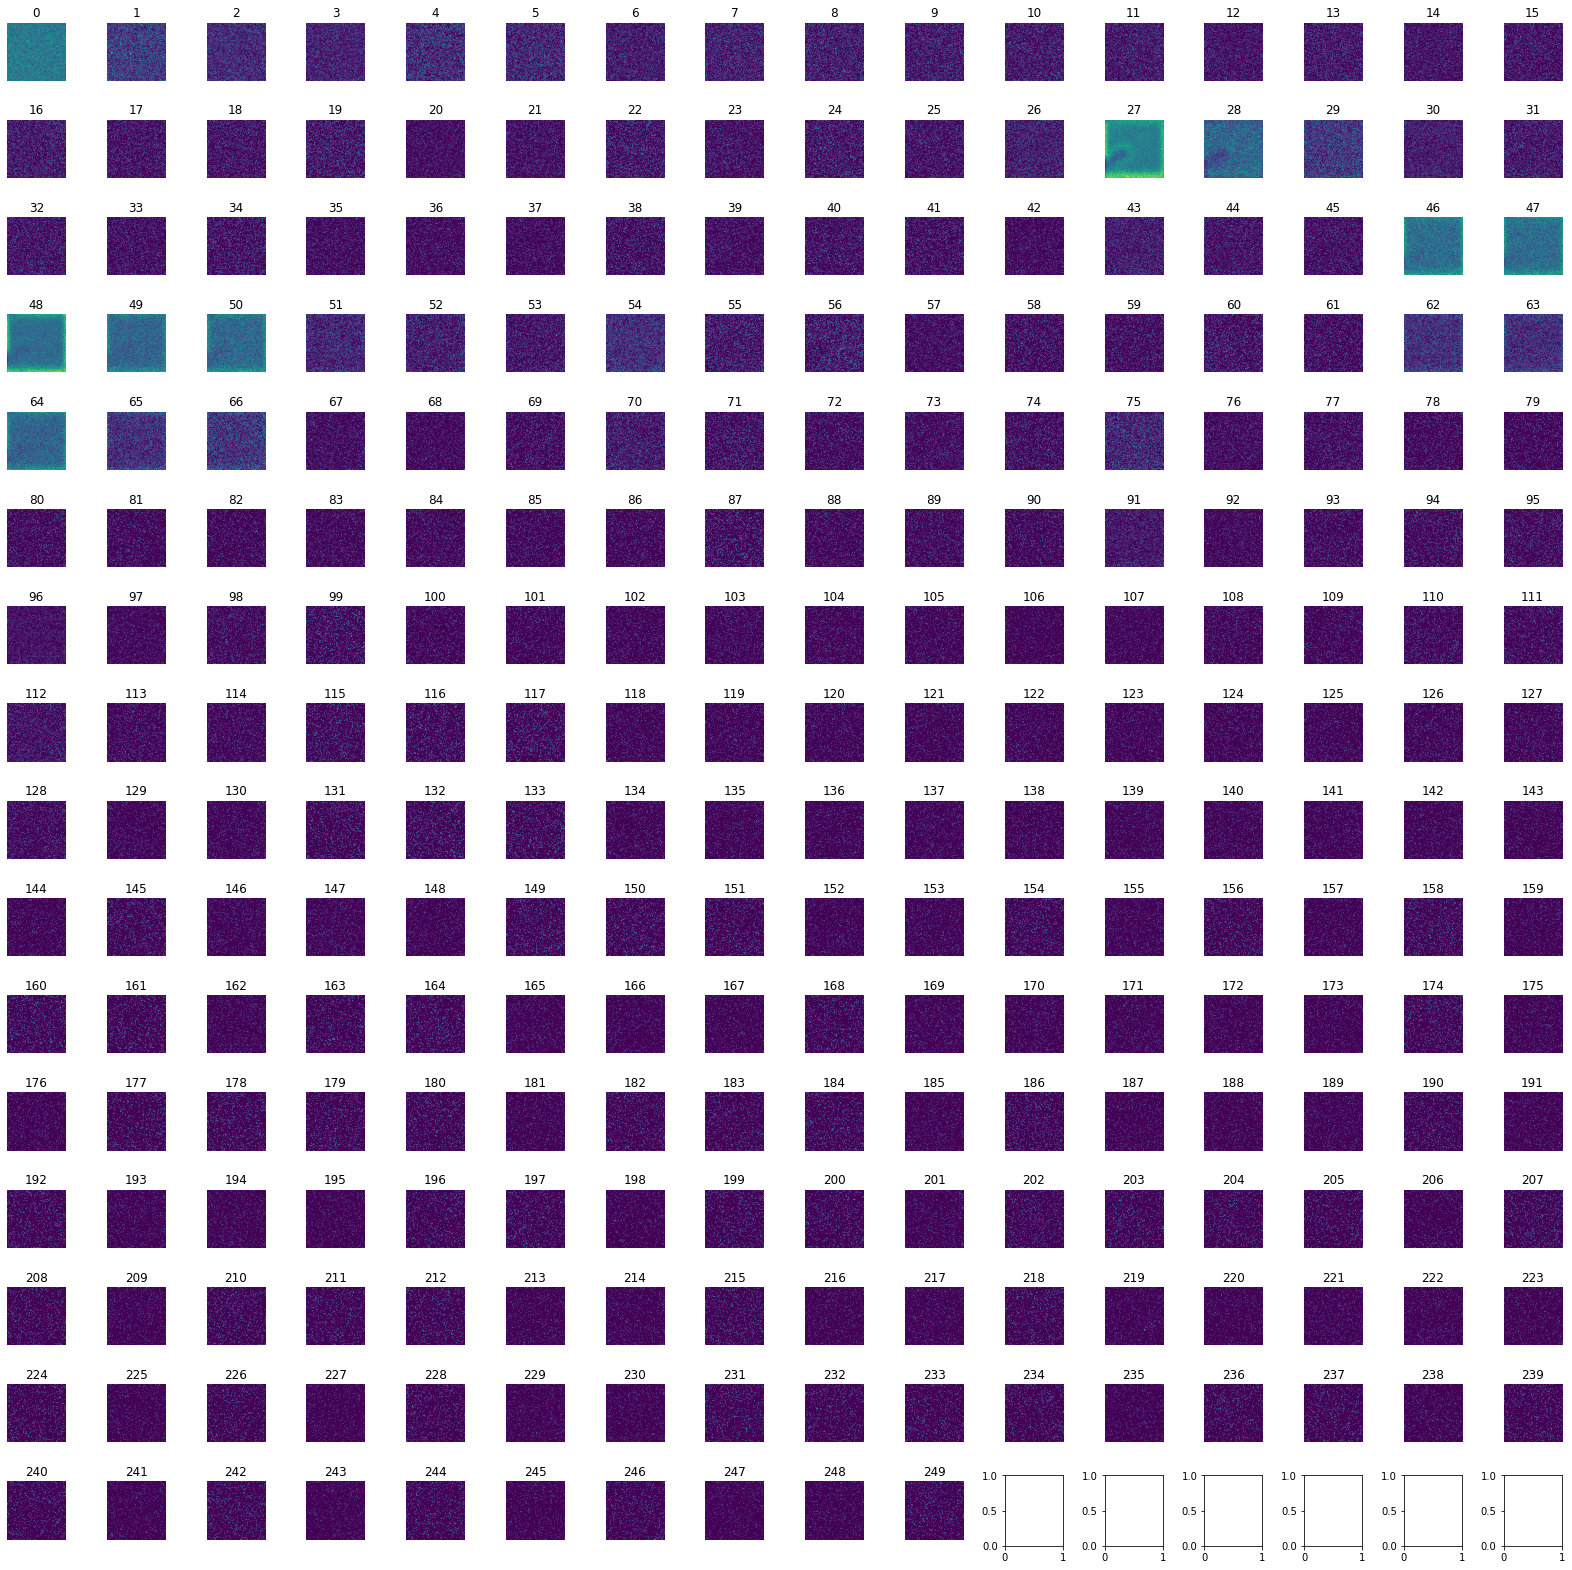

In [6]:
sample.projection(axes_displayed="xy", axis_parsed="m",axis_max_projection="z")

### Side projection

Easily visualise mass abundance over any other axes (here over z axis)

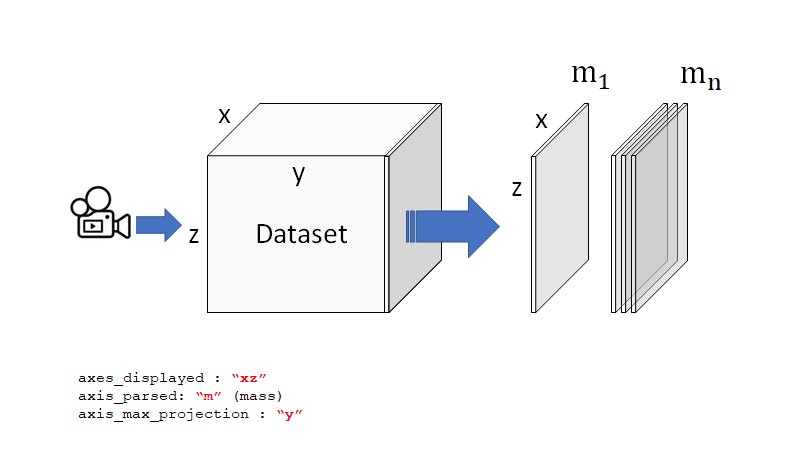

In [ ]:
sample.projection(axes_displayed="xz", axis_parsed="m",axis_max_projection="y" )

### Front projection
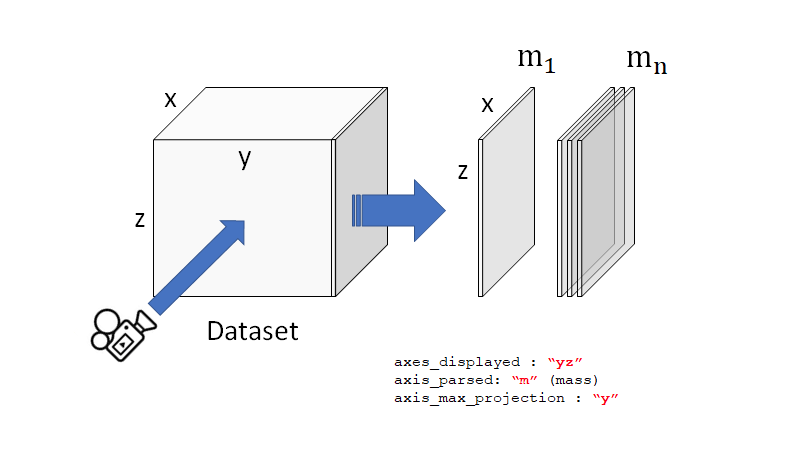

In [ ]:
sample.projection(axes_displayed="yz", axis_parsed="m",axis_max_projection="x" )

Confirms the higher abundance of mass 27 compared to other masses.

# Multivariate analysis

There're lots of masses, use Multi Variate Analysis (PCA) to find axis (and masses) that account for most off the variance in this sample.  

Make sure to select a portion of the data (sample) that contains material (i.e. not empty) !

Here we'll look at the interface (z = 25 to z = 35 microns ; see below)

<i>ps: Since chanel 0 is noise (no element has a mass of 0), set mass_start to 1<i>

In [ ]:
sample.plot_max_proj_peak_data(mode = "x", mass = 27 , cmap="gray")

In [7]:
%%time
sample.PCA_masses(x_min = 0 ,
                  x_max  = 100 ,
                  y_min = 0 ,
                  y_max = 100 ,
                  z_min = 25 , 
                  z_max = 35 , 
                  principal_components  = 20 , 
                  mass_start = 1  ,
                  mass_stop = 250)


done
Wall time: 11.4 s


Plot variance explained per component

In [ ]:
sample.principal_components()

Most of the variance explained by 9 dimensions which makes sense since most of other channels are empty.

Let's plot PC(principal component)1 vs PC2

In [ ]:
sample.pca_2D(4,5)

By hovering over the graphs, we see mass 48, 46 and 27 are the ones explaining most of the sample's variance.  This is logical as they are the three most abundant masses.  

Also, this indicates that abundance of isotopes/masses 48 and 27 is negatively correlated at voxel level.  

<b>This would have been impossible to determine from 3D plots !</b>

Let's look at those masses 27 and 48 in detail.


<i>Note that on PC2, mass 46 aligns with 49, 64, 47 and 50 (zoom in)</i>



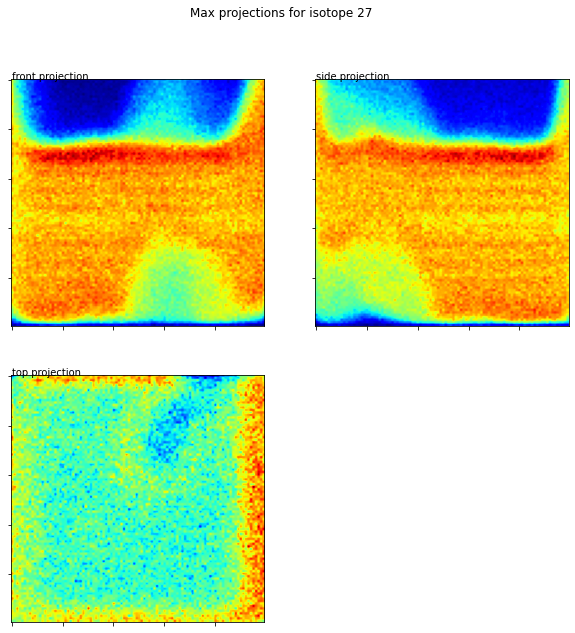

In [13]:
sample.grid_proj_isotope(isotope=27,size = 10, cmap = "jet")

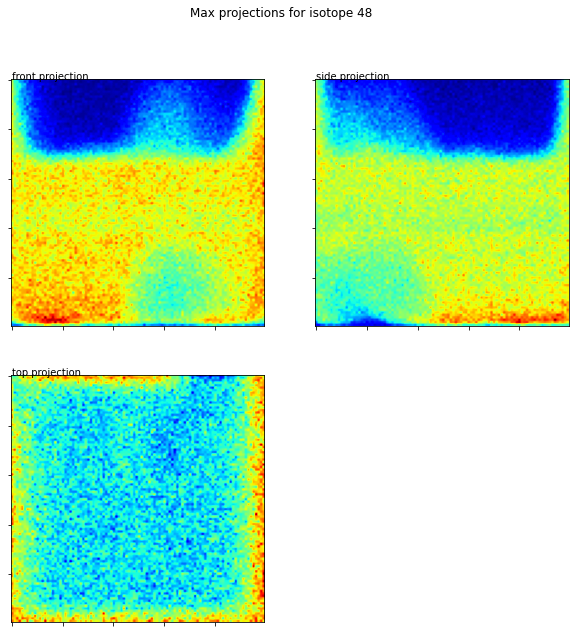

In [14]:
sample.grid_proj_isotope(isotope=48,size = 10, cmap = "jet")

We know that more isotopes have been detected. Indeed, PCA tells us that more dimensions are necessary to fully account for variance in sample.

Lets look at PC2 vs PC 3

In [ ]:
sample.pca_2D(2,3)

In [ ]:
sample.grid_proj_isotope(isotope=46,size = 10, cmap = "jet")

Show PC1 vs PC2 in 3D

In [ ]:
sample.pca_3D()

# Incremental PCA

Usefull to process entire dataset when PCA cannot be performed by lack of RAM.

For incPCA, the number of batches affects the number of masses used per batch.
With n_batches = 10, then 25 masses will be processed per batch, therefore, the number of components must be <= to the number of masses.

In [18]:
%%time
sample.incPCA_masses(x_min = 0 ,x_max  = 25 ,
              y_min = 0 ,y_max = 50,
              z_min = 0 , z_max = 100 , 
              principal_components  = 4, 
              mass_start = 1  , mass_stop = 250,
             n_batches = 50)


Wall time: 28.7 s


In [ ]:
sample.pca_2D(1,2)

# kernel PCA



When the relationship between variables is non-linear (manifold learning).
Following kernels are available:
* linear
* poly
* rbf
* sigmoid
* cosine

In [5]:
sample.kPCA_masses(x_min = 0 ,
                   x_max  = 100 ,
                   y_min = 0 ,
                   y_max = 100 ,
                   z_min = 25 , 
                   z_max = 35 , 
                   principal_components  = 200 , 
                   mass_start = 1  , 
                   mass_stop = 250,
                   kernel = 'poly', 
                   gamma = None )

In [ ]:
sample.pca_2D(1,2)

# T-Distributed Stochastic Neighbouring Entities (t-SNE)

n_components default=2

    Dimension of the embedded space.


perplexity default=30.0

    The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.


learning_rate default=200.0

    The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.


In [9]:
sample.TSNE_masses(n_components = 2,
                   perplexity = 50,
                   n_iter = 7500,
                   x_min = 0 ,
                   x_max  = 100 ,
                   y_min = 0 ,
                   y_max = 100 ,
                   z_min = 25 , 
                   z_max = 35 ,  
                   mass_start = 1  , 
                   mass_stop = 250,
                  learning_rate = 10)



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 249 samples in 0.053s...
[t-SNE] Computed neighbors for 249 samples in 0.807s...
[t-SNE] Computed conditional probabilities for sample 249 / 249
[t-SNE] Mean sigma: 44.779801
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.004963
[t-SNE] KL divergence after 1000 iterations: 0.454741


In [ ]:
sample.pca_2D()

# Compare abundance over a given axis

Choose which axis to project onto and which masses.  Several masses can be plotted simultaneously.

Here we look at abundance of masses 27,48 along z axis:

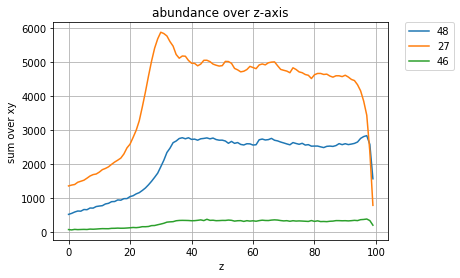

In [24]:
sample.plot_abundance(projection_axis="z", mass= [27,46,48])

Look at abundance of masses 27, 48 along y axis:

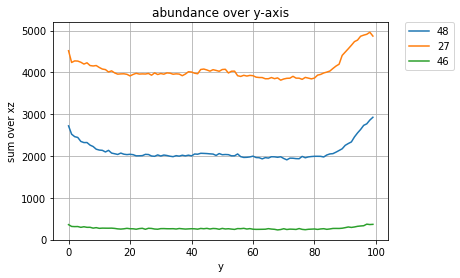

In [25]:
sample.plot_abundance(projection_axis="y", mass= [27,46,48])

Look at abundance of masses 27,48 along x axis:

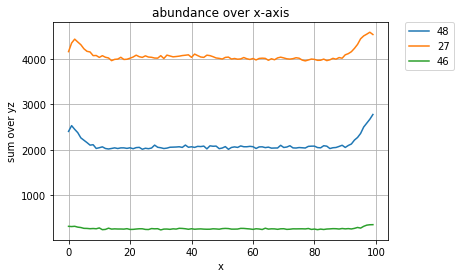

In [26]:
sample.plot_abundance(projection_axis="x", mass= [27,46,48])

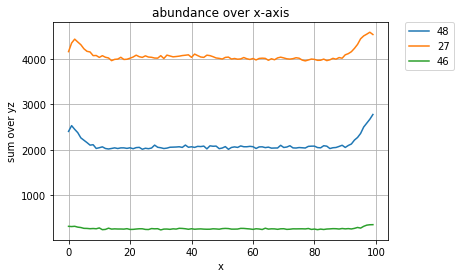

In [27]:
sample.plot_abundance(projection_axis="x", mass= [27,46,48])

Let's overlay max projection for isotopes of masses 27 and 48 (can add more if needed) isotopes

cadmium 46 Blues
aluminum 27 hot


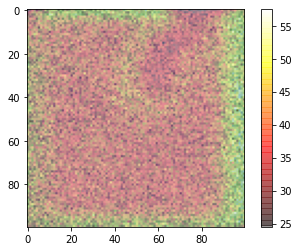

Wall time: 1.97 s


In [28]:
%%time
sample.overlay_max_proj(alpha=0.4,cadmium = [46,"Blues"],aluminum = [27,"hot"])

Blue is isotope 46

red/yellow is isotope 27

Green is where both isotopes are present (although this is on mas projection)

# 3D plots

Scatterplot for one isotope, fast but not interactive

In [ ]:
%%time
#al.convert_to_flat(al.peak_data,0.5,27)
sample.three_D_plot_isotope(cmap = None , size = 5 , depthshade = True ,
                        opacity = 0.5 , mass_threshold = ((27,1.20),
                                                          (48,1.0),
                                                         ))

Interactive scatterplot (can be very slow with lots of points), can overlab multiple isotopes in 3D.

In [ ]:
%%time
sample.plot_3D_scatter_plotly(opacity=0.9,
                              size = 2,
                              mass_threshold = ((48,1.0),
                                                (27,1.2),
                                               ))